# Inicial Configurations

## Honor code

In [1]:
name = "Lucas Paiolla and Marcos Siolin" 

honorPledge = "We affirm that we have not given or received any unauthorized " \
              "help on this assignment, and that this work is our own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)


Name:  Lucas Paiolla and Marcos Siolin

Honor pledge:  We affirm that we have not given or received any unauthorized help on this assignment, and that this work is our own.



## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (accuracy_score, confusion_matrix, recall_score, precision_score, 
                             f1_score, roc_auc_score, balanced_accuracy_score, roc_curve)

#%matplotlib inline

## Loading datasets and getting their dataframes version

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train])
X_test  = np.array([image[::2, 1::2] for image in X_test])

In [5]:
NUM_PIXELS = X_train.shape[2] ** 2
TRAIN_SIZE = X_train.shape[0]
TEST_SIZE = X_test.shape[0]
RANDOM_SEED = 42

print(f'NUM_PIXELS = {NUM_PIXELS}\nTRAIN_SIZE = {TRAIN_SIZE}\nTEST_SIZE = {TEST_SIZE}')

NUM_PIXELS = 196
TRAIN_SIZE = 60000
TEST_SIZE = 10000


In [6]:
X_train = (X_train/255.0).astype('float32').reshape((TRAIN_SIZE, NUM_PIXELS))
X_test = (X_test/255.0).astype('float32').reshape((TEST_SIZE, NUM_PIXELS))
y_train = y_train.reshape((TRAIN_SIZE, 1)).astype('int8')
y_test = y_test.reshape((TEST_SIZE, 1)).astype('int8')

In [7]:
train_df = pd.DataFrame(np.concatenate([X_train, y_train], axis=1))
train_df = train_df.rename(columns=lambda x : 'class' if x == NUM_PIXELS else f'f_{x}')
train_df['class'] = train_df['class'].astype('int8')
train_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.054902,0.988235,0.0,0.0,0.0,0.0,0.0,9


In [8]:
test_df = pd.DataFrame(np.concatenate([X_test.reshape(TEST_SIZE, NUM_PIXELS), y_test.reshape(TEST_SIZE, 1)], axis=1))
test_df = test_df.rename(columns=lambda x : 'class' if x == NUM_PIXELS else f'f_{x}')
test_df['class'] = test_df['class'].astype('int8')
test_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.070588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


# 0. Data Visualization

In [9]:
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', font_scale=1.2)

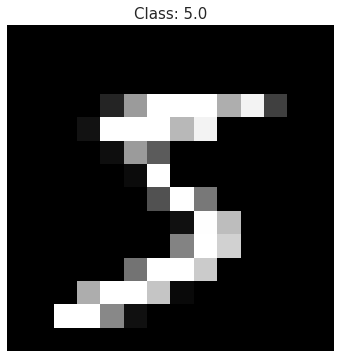

In [10]:
def show_digit(digit, ax=None):
    """
    Receives a pandas.Series representing a 28x28 image and plot it. 
    If ax is set, then plot the image on that axis, otherwise plot it using plt.
    """
    if ax == None: # if none, set to a new axis
        fig, ax = plt.subplots(1, 1)
    else:
        fig = plt.gcf()
    
    ax.imshow(digit[:-1].to_numpy().reshape(int(NUM_PIXELS ** 0.5), int(NUM_PIXELS ** 0.5)), cmap='gray')
    ax.set_title(f'Class: {digit[-1]}', fontdict=dict(fontsize=15))
    ax.axis('off')
    
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
show_digit(train_df.iloc[0], ax=ax)

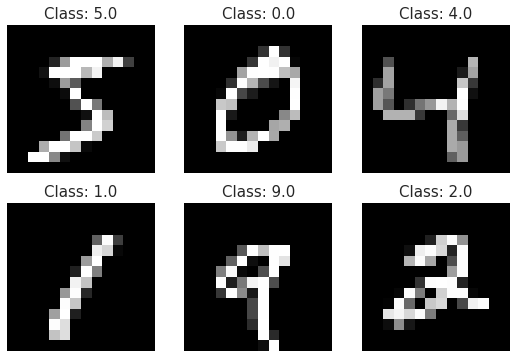

In [11]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    show_digit(train_df.iloc[i], ax=ax[i//3, i%3])
plt.show()

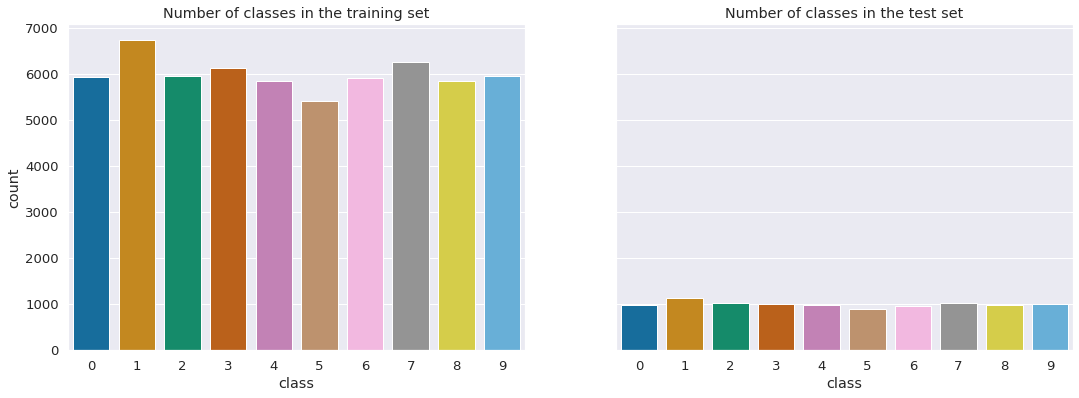

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6),  sharey=True, sharex=True)
sns.countplot(x='class', data=train_df, ax=ax[0])
ax[0].set_title('Number of classes in the training set')
sns.countplot(x='class', data=test_df, ax=ax[1])
ax[1].set_title('Number of classes in the test set')
ax[1].set_ylabel('');

# 1. Dataset Preparation

In [13]:
d_train, d_val, y_train, y_val = train_test_split(train_df.iloc[:, :-1], train_df['class'], test_size=.3, random_state=RANDOM_SEED, stratify=None)

Conferindo que os índices estão iguais:

In [14]:
d_train.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y_train.head()

918      7
17141    4
15558    5
27327    0
11606    1
Name: class, dtype: int8

In [16]:
d_train['class'] = y_train
d_val['class'] = y_val

Verificando que os dados estão estratificados:

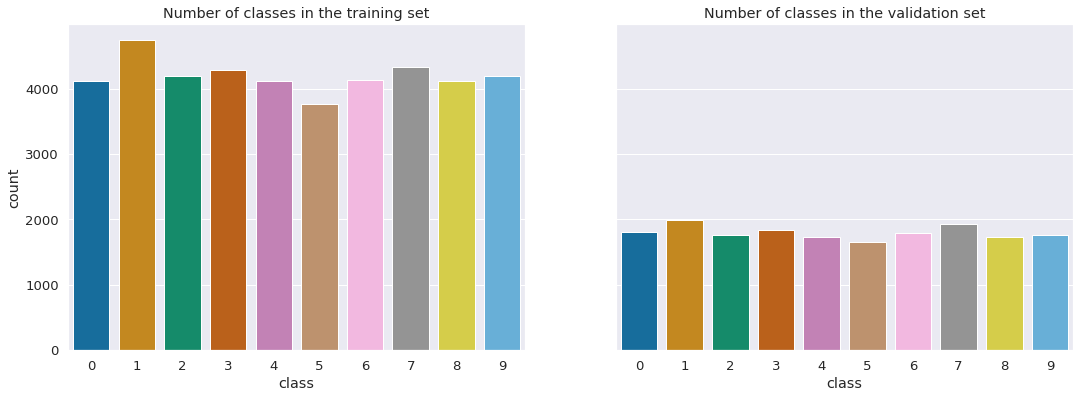

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6),  sharey=True, sharex=True)
sns.countplot(x='class', data=d_train, ax=ax[0])
ax[0].set_title('Number of classes in the training set')
sns.countplot(x='class', data=d_val, ax=ax[1])
ax[1].set_title('Number of classes in the validation set')
ax[1].set_ylabel('');

De fato os dados estão estratificados (podemos verificar comparando esse gráfico com o anterior)

In [18]:
d_train.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
27327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [19]:
d_val.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,class
12628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.647059,0.403922,0.0,0.0,0.0,0.0,0.0,0.0,7
37730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
39991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,8
8525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
8279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3


In [20]:
d_val['class']

12628    7
37730    3
39991    8
8525     9
8279     3
        ..
2649     9
1807     1
2861     5
19732    0
8897     0
Name: class, Length: 18000, dtype: int8

# 2. Training, evaluating and selecting models

In [42]:
log_reg = LogisticRegression(max_iter=400, random_state=RANDOM_SEED, n_jobs=-1)
nn = MLPClassifier(hidden_layer_sizes=(10,), random_state=RANDOM_SEED)
svc = LinearSVC(random_state=RANDOM_SEED, max_iter=400)

k = 5 # k-fold
X_train = d_train.iloc[:, :-1]
y_train = d_train.iloc[:, -1]
n_iter = 5
scoring = 'accuracy'
n_jobs = 5
verbose = 3

In [33]:
log_reg_params = {
    'C' : np.geomspace(1e-3, 1e0, 4)
}

nn_params = {
    'alpha' : np.geomspace(1e-3, 1e0, 4),
    'activation' : ['relu', 'tanh', 'logistic'],
    'hidden_layer_sizes' : [(10,), (5, 5), (20,), (10, 5)]
}

svc_params = {
   'C' : np.geomspace(1e-3, 1e0, 4),
}

log_reg_gs = GridSearchCV(log_reg, log_reg_params, cv=k, scoring=scoring, n_jobs=n_jobs, verbose=verbose)
log_reg_gs.fit(X_train, y_train)
nn_gs = RandomizedSearchCV(nn, nn_params, cv=k, n_iter=n_iter, scoring=scoring, n_jobs=n_jobs, verbose=verbose)
nn_gs.fit(X_train, y_train)
svc_gs = GridSearchCV(svc, svc_params, cv=k, scoring=scoring, n_jobs=n_jobs, verbose=verbose)
svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/giatro/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/giatro/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=400, random_state=42), n_jobs=5,
             param_grid={'C': array([0.001, 0.01 , 0.1  , 1.   ])},
             scoring='accuracy', verbose=3)

## 2.1 Visualizando os erros 

In [35]:
def get_estimator_name(model):
    return str(type(model)).split('.')[-1].replace("\'>", '')

def get_errors(name_estimator, y_pred, y_true):
    recall = recall_score(y_pred, y_true, average='macro')
    precision = precision_score(y_pred, y_true, average='macro')
    f1 = f1_score(y_pred, y_true, average='macro')
    accuracy = accuracy_score(y_pred, y_true)
    balanced_accuracy = balanced_accuracy_score(y_pred, y_true)
    scores = [accuracy, balanced_accuracy, precision, recall, f1]
    return pd.Series(scores, name=name_estimator, index=['accuracy', 'accuracy_balanced', 'precision', 'recall', 'f1'])

def get_errors_df(estimators, X_test, y_test):
    errors_df = pd.DataFrame(columns=['accuracy', 'accuracy_balanced', 'precision', 'recall', 'f1'])
    for estimator in estimators:
        y_pred = estimator.predict(X_test)
        row = get_errors(get_estimator_name(estimator), y_pred, y_test)
        errors_df = errors_df.append(row)
    return errors_df

In [95]:
def plot_errors(errors_df):
    fig, ax = plt.subplots(2, 3, figsize=(15,12))
    plt.subplots_adjust(hspace=0.35)
    for i, column in enumerate(errors_df.columns): 
        tmp_df = pd.concat([errors_df, pd.Series(range(len(errors_df)), name='index', index=errors_df.index)], axis=1)
        sns_plot = sns.barplot(data=tmp_df, x='index', y=column, ax=ax[i//3][i%3])
        sns_plot.set_xticklabels(labels=errors_df.index, rotation=15)
        sns_plot.set(xlabel='', ylabel='', title=column)
        sns_plot.set_title(column, fontdict=dict(fontsize=15, fontweight='semibold'), pad=8)
        for i, (index, row) in enumerate(errors_df.iterrows()):
            sns_plot.text(i, row[f'{column}']+0.01, round(row[f'{column}'], 3), color='black', ha="center")
    ax[1][2].axis('off');

In [65]:
def print_confusion_matrix(y_pred, y_true, estimator_name):
    plt.figure(figsize=(12,9))
    plt.title(f'{estimator_name.upper()} CONFUSION MATRIX', fontdict=dict(fontsize=25))
    plt.ylabel('Known class')
    plt.xlabel('Predicted class')
    cm = confusion_matrix(y_true, y_pred)
    
    mask = np.ones(cm.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    vmax = cm[mask].max()
    
    figure = sns.heatmap(cm, annot=True, linewidths=0.5, fmt='.0f', cmap='seismic', vmin=0, vmax=1.1*vmax)
    figure.set(ylabel='Known class', xlabel='Predicted class');

In [38]:
errors_df = get_errors_df([log_reg_gs.best_estimator_, nn_gs.best_estimator_, svc_gs.best_estimator_], d_train.iloc[:, :-1], d_train['class'].to_numpy())
errors_df

,accuracy,accuracy_balanced,precision,recall,f1
LogisticRegression,0.915524,0.914614,0.914442,0.914614,0.914468
MLPClassifier,0.895905,0.895139,0.894887,0.895139,0.894644
LinearSVC,0.905119,0.903900,0.903729,0.903900,0.903650


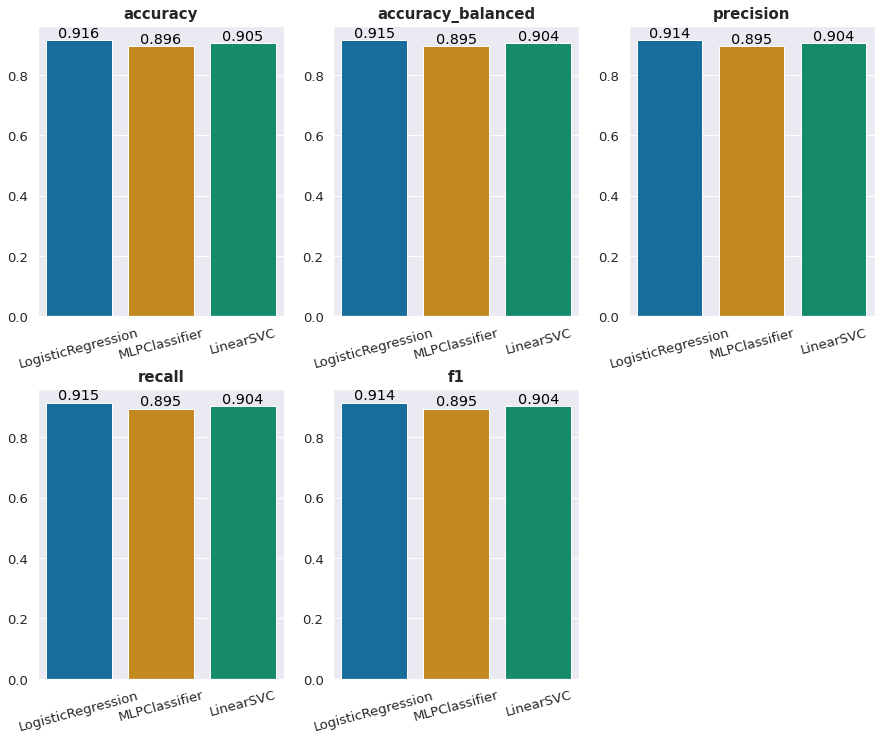

In [39]:
plot_errors(errors_df)

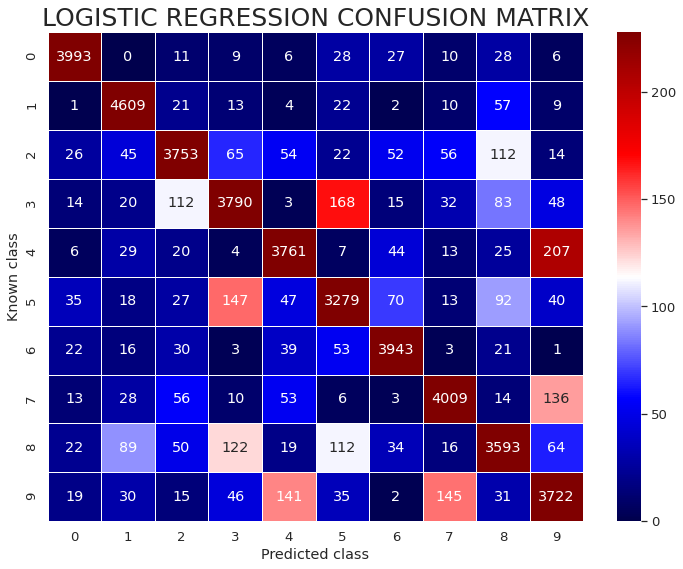

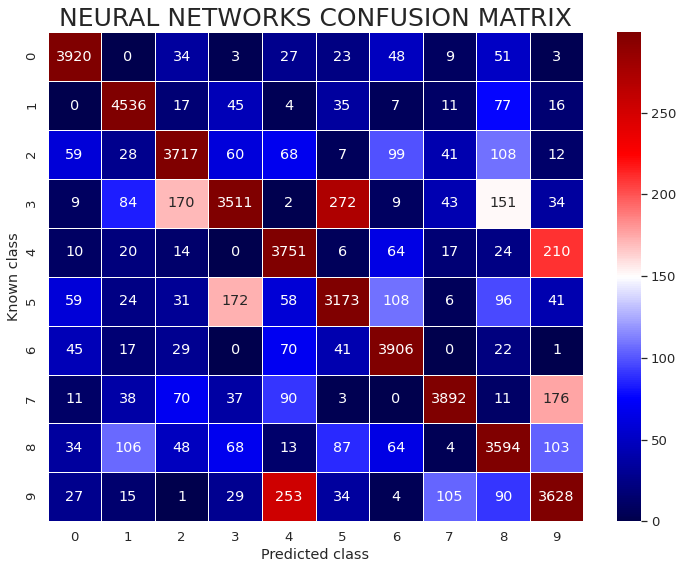

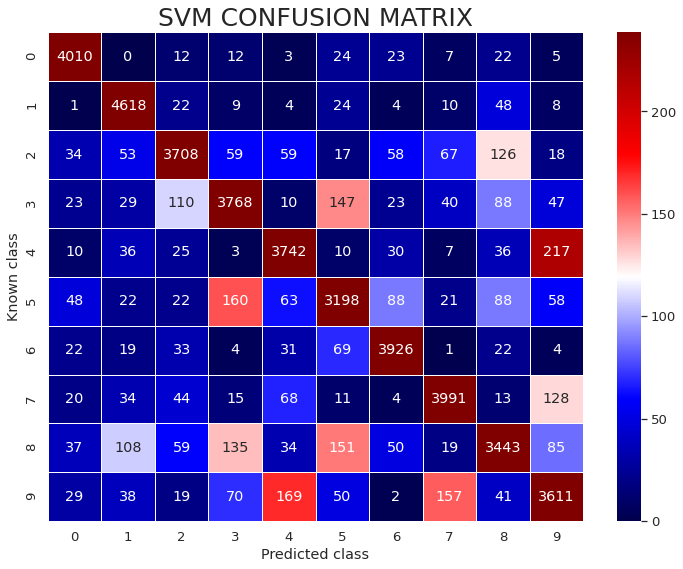

In [66]:
print_confusion_matrix(log_reg_gs.best_estimator_.predict(X_train), y_train, 'logistic regression')
print_confusion_matrix(nn_gs.best_estimator_.predict(X_train), y_train, 'neural networks')
print_confusion_matrix(svc_gs.best_estimator_.predict(X_train), y_train, 'svm')

In [67]:
log_reg_score = log_reg_gs.best_score_
nn_score = nn_gs.best_score_
svc_score = svc_gs.best_score_
log_reg_score, nn_score, svc_score
print(f'MELHOR ACURÁCIA USANDO {k}-FOLD CROSS VALIDATION')
print(f'-> Regressão Logística: {log_reg_score*100:.2f}%')
print(f'-> Rede Neural: {nn_score*100:.2f}%')
print(f'-> Support Vector Machine: {svc_score*100:.2f}%')

MELHOR ACURÁCIA USANDO 5-FOLD CROSS VALIDATION
-> Regressão Logística: 90.72%
-> Rede Neural: 88.73%
-> Support Vector Machine: 89.89%


In [68]:
print('MELHORES PARÂMETROS ENCONTRADOS:')
print(f'-> Regressão Logística: {log_reg_gs.best_params_}')
print(f'-> Rede Neural: {nn_gs.best_params_}')
print(f'-> Support Vector Machine: {svc_gs.best_params_}')

MELHORES PARÂMETROS ENCONTRADOS:
-> Regressão Logística: {'C': 1.0}
-> Rede Neural: {'hidden_layer_sizes': (5, 5), 'alpha': 0.001, 'activation': 'tanh'}
-> Support Vector Machine: {'C': 1.0}


Para selecionar os hiperparâmetros utilizamos o `GridSearch` provido pelo `sklearn`. Ele é um método onde passamos um estimator do `sklearn` e um dicionário de hiperparâmetros que queremos avaliar. Então, para cada conjunto de hiperparâmetros possíveis, o método vai avaliar o quão bom é aquele modelo utilizando o método de k-fold cross validation.
Além disso, utilizando o `RandomizedSearch` provido pelo `sklearn` para selecionar os hiperparâmetros da rede neural. Isso porque como são muitos parâmetros, não dá para testar todas as combinações como no `GridSearch`. 

Para os hiperparâmetros, buscamos o seguinte:

- Na regressão logística, apenas avaliamos diferentes valores de $C$, o coeficiente de regularização; 

- Na rede neural, avaliamos também diferentes valores de $\alpha$, o coeficiente de regularização. Além disso, nós testamos diferentes funções de ativação e diferentes números de nós na _hidden layer_;

- Na SVM, avaliamos apenas $C$, o coeficiente de regularização.

# 3. Choosing a final model

In [69]:
log_reg_predict = log_reg_gs.best_estimator_.predict(d_val.iloc[:, :-1])
log_reg_predict

array([7, 3, 8, ..., 5, 0, 0], dtype=int8)

In [70]:
nn_predict = nn_gs.best_estimator_.predict(d_val.iloc[:, :-1])
nn_predict

array([7, 3, 8, ..., 5, 0, 0], dtype=int8)

In [71]:
svc_predict = svc_gs.best_estimator_.predict(d_val.iloc[:, :-1])
svc_predict

array([7, 3, 8, ..., 5, 0, 0], dtype=int8)

In [72]:
errors_df = get_errors_df([log_reg_gs.best_estimator_, nn_gs.best_estimator_, svc_gs.best_estimator_], d_val.iloc[:, :-1], d_val['class'].to_numpy())
errors_df

,accuracy,accuracy_balanced,precision,recall,f1
LogisticRegression,0.911778,0.910720,0.910570,0.910720,0.910567
MLPClassifier,0.888722,0.887559,0.887744,0.887559,0.887292
LinearSVC,0.902500,0.901132,0.900856,0.901132,0.900832


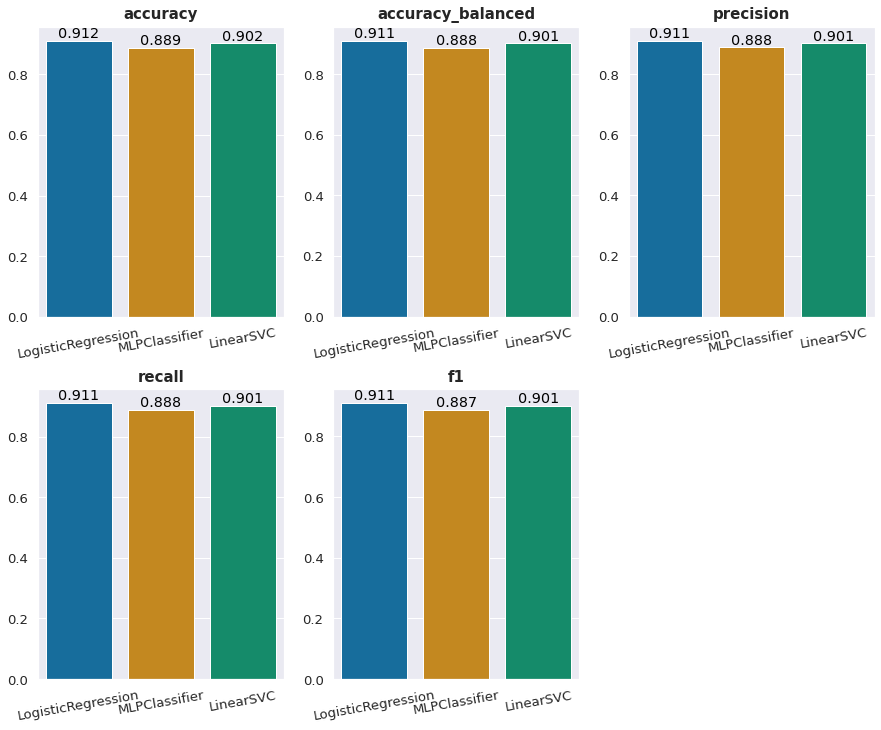

In [94]:
plot_errors(errors_df)

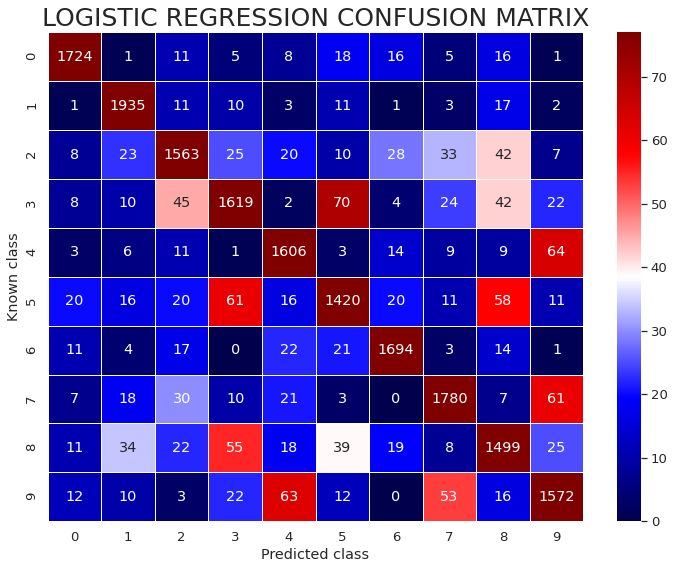

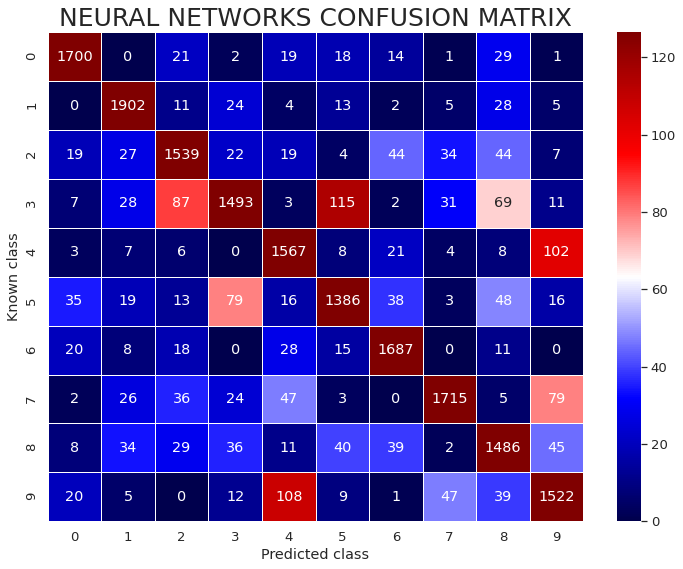

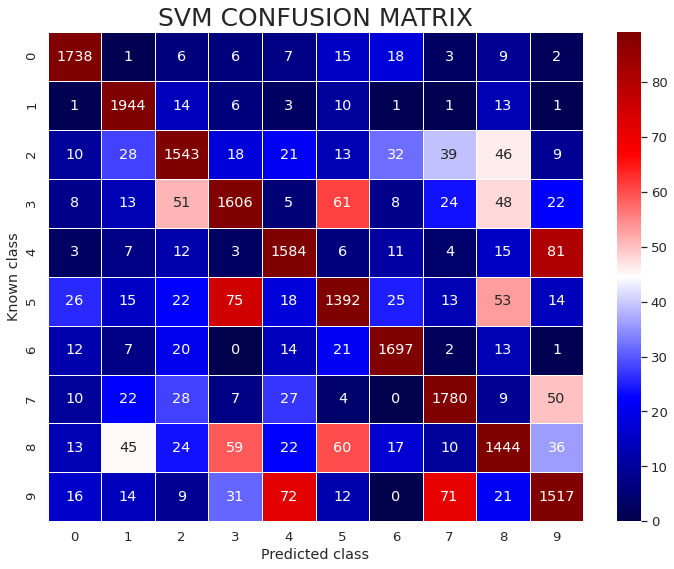

In [75]:
print_confusion_matrix(log_reg_predict, d_val['class'], 'logistic regression')
print_confusion_matrix(nn_predict, d_val['class'], 'neural networks')
print_confusion_matrix(svc_predict, d_val['class'], 'svm')

In [106]:
models = [log_reg_gs, nn_gs, svc_gs]
chosen_model = log_reg_gs
for model in models: 
    if model.best_score_ > chosen_model.best_score_:
        chosen_model = model

chosen_model = chosen_model.best_estimator_
print(f'O melhor modelo é:\n{chosen_model}')

O melhor modelo é:
LogisticRegression(max_iter=400, n_jobs=-1, random_state=42)


# 4. Error estimation

In [107]:
y_predict = chosen_model.predict(test_df.iloc[:, :-1])
y_true = test_df.iloc[:, -1]
test_accuracy = accuracy_score(y_true, y_predict)
print(f'A acurácia no conjunto de testes: {test_accuracy * 100}%')

A acurácia no conjunto de testes: 91.89%


In [108]:
test_errors_df = get_errors_df([chosen_model], test_df.iloc[:, :-1], test_df['class'].to_numpy())
test_errors_df

,accuracy,accuracy_balanced,precision,recall,f1
LogisticRegression,0.9189,0.91805,0.917813,0.91805,0.91775


## 4.1 Treinando em $D_{\text{train}} \bigcup D_{\text{val}}$

In [109]:
chosen_model.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1])

LogisticRegression(max_iter=400, n_jobs=-1, random_state=42)

In [110]:
new_test_errors_df = get_errors_df([chosen_model], test_df.iloc[:, :-1], test_df['class'].to_numpy())
index_name = new_test_errors_df.index[0]
new_test_errors_df = new_test_errors_df.rename(index={index_name : 'new_'+index_name})
new_test_errors_df

,accuracy,accuracy_balanced,precision,recall,f1
new_LogisticRegression,0.9189,0.91805,0.917813,0.91805,0.91775


In [111]:
test_errors_df.append(new_test_errors_df)

,accuracy,accuracy_balanced,precision,recall,f1
LogisticRegression,0.9189,0.91805,0.917813,0.91805,0.91775
new_LogisticRegression,0.9189,0.91805,0.917813,0.91805,0.91775


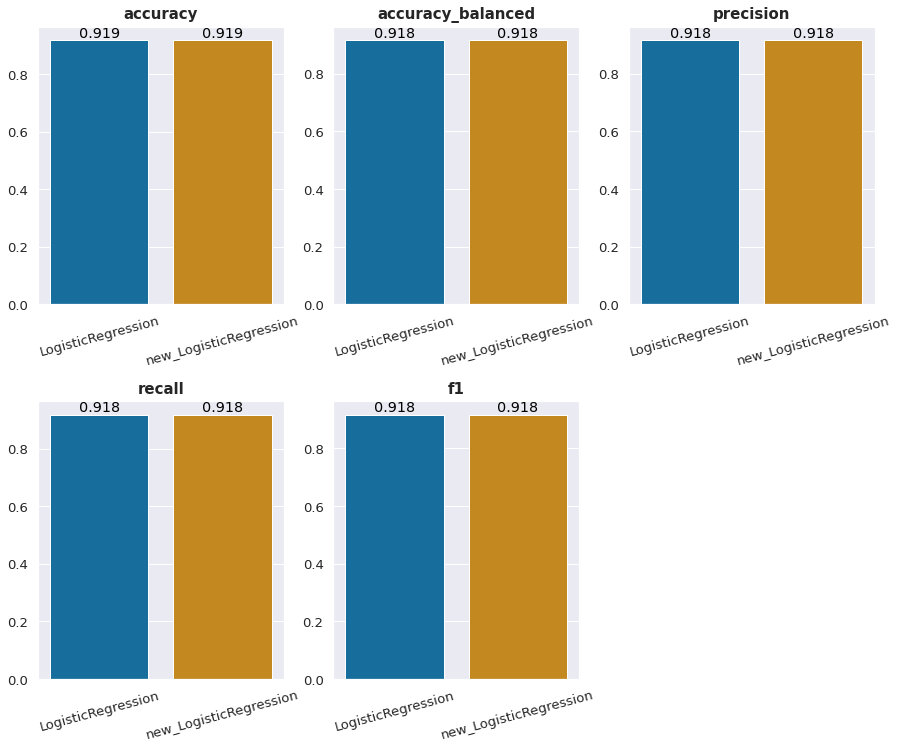

In [112]:
plot_errors(test_errors_df.append(new_test_errors_df))

Podemos observar que ao treinar no conjunto de treino inteiro, o modelo tem uma melhora, mas nada muito significativo. 